# Population and median income growth in Finland 2013-2017 by postal code

In [ ]:
# The example requires installation of packages as follows:
%pip install sdhpy --upgrade
%pip install matplotlib --upgrade
%pip install adjustText --upgrade

## 1 Read source data from Smartdatahub

In [3]:
from sdhpy.pandas import SdhPandas
# Copy your API key from https://www.smartdatahub.io/ (user profile page) below
sdh_catalog = SdhPandas(store_apikey="xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx")
sdh_dataset = sdh_catalog.fi_sdh.postalcode_profile_finland__profile_all_observed
df = sdh_dataset.data
df.head()

,country,postalcode,name,municipality_number,area_sqkm,shape_length,geom_geojson,geom_geotext,area_sqkm_sea,shape_length_sea,...,sports_facilities_animal,sports_facilities_maintenance,dwellings_transactions_old_housing_co,dwellings_transactions_est_old_housing_co,dwellings_price_avg_old_housing_co,dwellings_price_avg_est_old_housing_co,valuedate_start,valuedate_end,valuedate,orig_extractdate
0,fi,2230,Matinkylä,49,5.963634,NaN,"{ ""type"": ""MultiPolygon"", ""coordinates"": [ [ [...",MULTIPOLYGON (((24.761868438459782 60.15920025...,22.017150,NaN,...,2.0,0.0,345.0,345.0,3952.0,3952.0,2018-01-01,2018-12-31,2018-12-31,2020-03-25
1,fi,2600,Etelä-Leppävaara,49,4.429723,NaN,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [ 24.8...",POLYGON ((24.814695405173005 60.21962659068191...,5.619834,NaN,...,0.0,0.0,156.0,156.0,3862.0,3862.0,2018-01-01,2018-12-31,2018-12-31,2020-03-25
2,fi,2940,Lippajärvi,49,22.775370,32145.947,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [ 24.7...","POLYGON ((24.71402546320404 60.29979686707162,...",22.775370,32145.947,...,NaN,NaN,113.0,113.0,3056.0,3056.0,2013-01-01,2013-12-31,2013-12-31,2020-03-25
3,fi,4420,Kyrölä,186,3.678428,9384.193,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [ 25.0...",POLYGON ((25.099717356344346 60.44266309103242...,3.678428,9384.193,...,NaN,NaN,80.0,80.0,2424.0,2424.0,2017-01-01,2017-12-31,2017-12-31,2020-03-25
4,fi,4630,Sההksjהrvi,505,66.451490,42563.320,"{ ""type"": ""Polygon"", ""coordinates"": [ [ [ 25.4...",POLYGON ((25.474215913324073 60.54763036486681...,66.451490,42563.320,...,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01,2016-12-31,2016-12-31,2020-03-25


## 2 Analyze population and median income data by area

In [4]:
data_2013_2017 = df[(df.valuedate.isin(['2013-12-31', '2017-12-31'])) & 
                         (df.orig_extractdate == df.orig_extractdate.max())] \
                        [['postalcode', 'name', 'area_sqkm', 'inhabitants_total',
                         'income_median', 'income_average', 'valuedate', 'orig_extractdate']]

data_2013_2017_merged = data_2013_2017[data_2013_2017.valuedate == '2017-12-31'].merge(
    data_2013_2017[data_2013_2017.valuedate == '2013-12-31'],
    left_on='postalcode', right_on='postalcode', how='inner')

data_2013_2017_merged['inhabitants_total_diff'] = (
    (data_2013_2017_merged['inhabitants_total_x'] - data_2013_2017_merged['inhabitants_total_y']) /
    data_2013_2017_merged['inhabitants_total_y'] * 100)

data_2013_2017_merged['income_median_diff'] = (
    (data_2013_2017_merged['income_median_x'] - data_2013_2017_merged['income_median_y']) /
    data_2013_2017_merged['income_median_y'] * 100)

data_2013_2017_merged['area_sqkm_diff'] = (
    (data_2013_2017_merged['area_sqkm_x'] - data_2013_2017_merged['area_sqkm_y']) /
    data_2013_2017_merged['area_sqkm_y'] * 100)

data_2013_2017_merged_filtered = data_2013_2017_merged[(data_2013_2017_merged.inhabitants_total_y > 0) &
                                                       (data_2013_2017_merged.income_median_y > 0) &
                                                       (abs(data_2013_2017_merged.area_sqkm_diff) < 10)]

data_2013_2017_merged_filtered.head()

,postalcode,name_x,area_sqkm_x,inhabitants_total_x,income_median_x,income_average_x,valuedate_x,orig_extractdate_x,name_y,area_sqkm_y,inhabitants_total_y,income_median_y,income_average_y,valuedate_y,orig_extractdate_y,inhabitants_total_diff,income_median_diff,area_sqkm_diff
0,4420,Kyrölä,3.678428,3970.0,26497.0,27731.0,2017-12-31,2020-03-25,Kyrölä,4.052735,4048.0,25694.0,26929.0,2013-12-31,2020-03-25,-1.926877,3.125243,-9.235911
1,39310,Viljakkala Keskus,98.581510,1023.0,19952.0,22979.0,2017-12-31,2020-03-25,Viljakkala Keskus,98.138930,1014.0,18817.0,21513.0,2013-12-31,2020-03-25,0.887574,6.031780,0.450973
2,62340,Kuoppa-Vakkuri,18.803150,100.0,18312.0,20151.0,2017-12-31,2020-03-25,Kuoppa-Vakkuri,18.803150,103.0,17874.0,20539.0,2013-12-31,2020-03-25,-2.912621,2.450487,0.000000
3,64830,Villamo,48.753550,175.0,15870.0,20767.0,2017-12-31,2020-03-25,Villamo,48.753550,196.0,14918.0,18913.0,2013-12-31,2020-03-25,-10.714286,6.381552,0.000000
4,66350,Tainus,67.608630,146.0,15586.0,19246.0,2017-12-31,2020-03-25,Tainus,67.608630,145.0,15467.0,19706.0,2013-12-31,2020-03-25,0.689655,0.769380,0.000000


## 3 Visualize outcome with Matplotlib

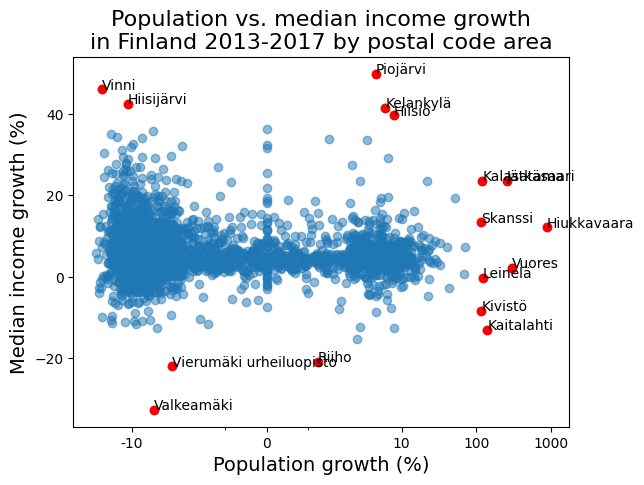

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data_2013_2017_merged_filtered.inhabitants_total_diff, data_2013_2017_merged_filtered.income_median_diff, alpha=0.5)
plt.xlabel('Population growth (%)', size=14)
plt.ylabel('Median income growth (%)', size=14)
plt.xscale('symlog')
plt.title('Population vs. median income growth\nin Finland 2013-2017 by postal code area', size=16)
plt.xticks([-10, 0, 10, 100, 1000], [-10, 0, 10, 100, 1000])
df_subset1 = data_2013_2017_merged_filtered.query('inhabitants_total_diff > 80 or income_median_diff > 38 or income_median_diff < -20')
plt.scatter(df_subset1.inhabitants_total_diff, df_subset1.income_median_diff, color="red")
for i in range(df_subset1.shape[0]):
    plt.annotate(df_subset1.name_x.tolist()[i],
                 xy=(df_subset1.inhabitants_total_diff.tolist()[i], df_subset1.income_median_diff.tolist()[i]))
plt.savefig('figure.png', dpi=150)

## 4 Improve visualization

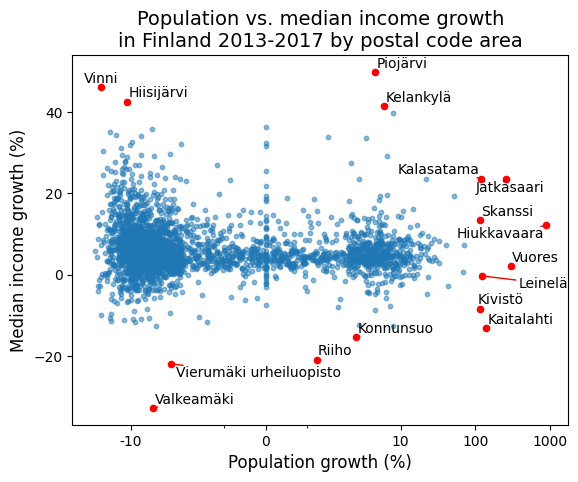

In [10]:
from adjustText import adjust_text
plt.scatter(data_2013_2017_merged_filtered.inhabitants_total_diff, data_2013_2017_merged_filtered.income_median_diff, alpha=0.5, s=10)
plt.xlabel('Population growth (%)', size=12)
plt.ylabel('Median income growth (%)', size=12)
plt.xscale('symlog')
plt.title('Population vs. median income growth\nin Finland 2013-2017 by postal code area', size=14)
plt.xticks([-10, 0, 10, 100, 1000], [-10, 0, 10, 100, 1000])
df_subset1 = data_2013_2017_merged_filtered.query('inhabitants_total_diff > 80 or income_median_diff > 40 or income_median_diff < -13')
plt.scatter(df_subset1.inhabitants_total_diff, df_subset1.income_median_diff, color="red", s=20)
texts = [plt.text(df_subset1.inhabitants_total_diff.tolist()[i], 
                  df_subset1.income_median_diff.tolist()[i],
                  df_subset1.name_x.tolist()[i]) for i in range(df_subset1.shape[0])]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red'))
plt.savefig('figure2.png', dpi=150)